<a href="https://colab.research.google.com/github/pedromazim/visao/blob/main/visao_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from skimage import io
import matplotlib.pyplot as pt

In [4]:
from numba import jit

In [37]:
@jit(nopython=True, looplift=True)
def make_gray(img, weights):

    '''
    converts an colored RGB image to grayscale

    img : image to be converted
    weights : list or array containing the relative weights of red, blue and green for conversion

    '''
    img_recol = np.zeros_like(img)

    img_recol = weights[0]*img[:,:,0] + weights[1]*img[:,:,1] + weights[2]*img[:,:,2]

    return img_recol

### Expandindo e comprimindo imagens a partir da análise de histograma

In [99]:
img = io.imread('https://github.com/pedromazim/visao/blob/main/Unequalized_Hawkes_Bay_NZ.jpg?raw=true')
img2 = io.imread('https://github.com/pedromazim/visao/blob/fb3dbd4675ced5418436f2656f2c2f781a73c84a/MtTahoma.bmp?raw=True')

In [100]:
img = make_gray(img, [1/3,1/3,1/3])

(-0.5, 1023.5, 682.5, -0.5)

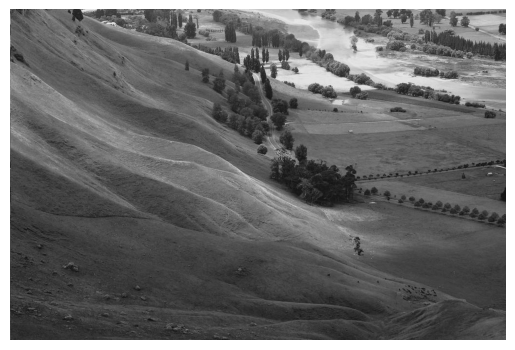

In [40]:
pt.imshow(img, cmap='gray')
pt.axis('off')

(0.0, 255.0)

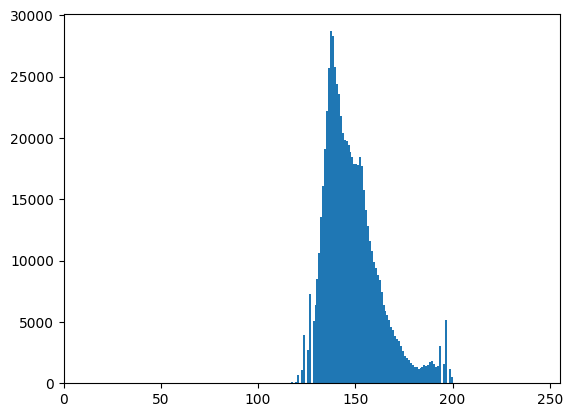

In [42]:
counts, bins = np.histogram(img, bins=np.arange(0,256))
pt.stairs(counts, bins, fill=True)
pt.xlim(0,255)

In [43]:
@jit(nopython=True, looplift=True)
def extend_img(img, counts):
    aux = 0
    for c in range(int(np.mean(np.where(counts!=0)[0])),np.where(counts!=0)[0][0],-1):
        for px in np.argwhere(img==c):
            img[px[0],px[1]] = c-aux
        aux+=1
    aux = 0
    for c in range(int(np.mean(np.where(counts!=0)[0])),np.where(counts!=0)[0][-1],1):
        for px in np.argwhere(img==c):
            img[px[0],px[1]] = c+aux
        aux +=1
    return img

In [44]:
img_ext = extend_img(img,counts)
counts_ext, bins = np.histogram(img_ext, bins=np.arange(0,256))

(-0.5, 1023.5, 682.5, -0.5)

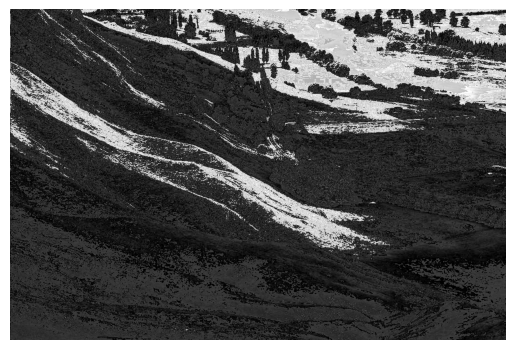

In [45]:
pt.imshow(img_ext, cmap='gray')
pt.axis('off')

(0.0, 255.0)

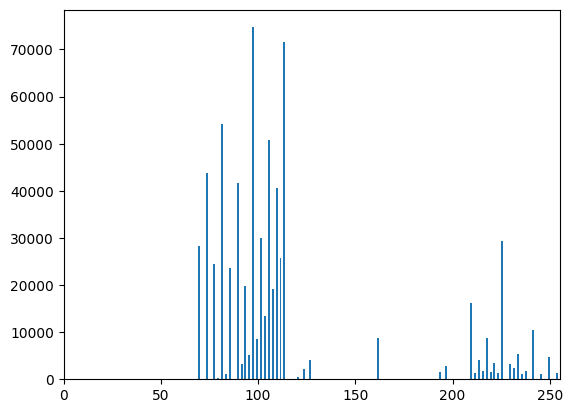

In [46]:
pt.stairs(counts_ext, bins, fill=True)
pt.xlim(0,255)

In [48]:
img2 = make_gray(img2, [1/3,1/3,1/3])

(-0.5, 1919.5, 1079.5, -0.5)

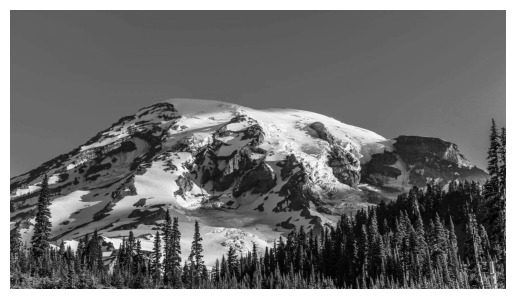

In [49]:
pt.imshow(img2, cmap='gray')
pt.axis('off')

(0.0, 255.0)

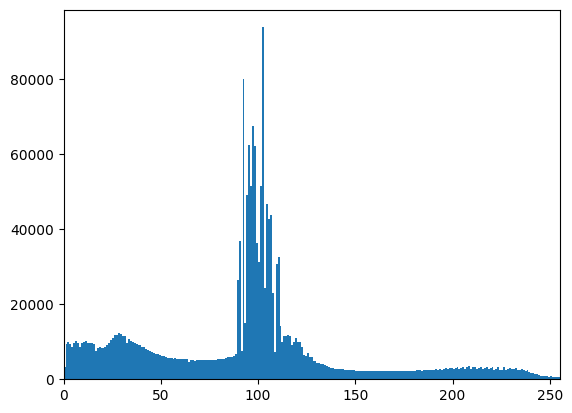

In [50]:
counts, bins = np.histogram(img2, bins=np.arange(0,256))
pt.stairs(counts, bins, fill=True)
pt.xlim(0,255)

In [55]:
@jit(nopython=True, looplift=True)
def compress_img(img, counts):
    aux = 0
    for c in range(int(np.mean(np.where(counts!=0)[0])),np.where(counts!=0)[0][0],-1):
        for px in np.argwhere(img==c):
            img[px[0],px[1]] = c+1
        aux+=1
    aux = 0
    for c in range(int(np.mean(np.where(counts!=0)[0])),np.where(counts!=0)[0][-1],1):
        for px in np.argwhere(img==c):
            img[px[0],px[1]] = c-1
        aux +=1
    return img

In [56]:
img_comp = compress_img(img2,counts)
counts_comp, bins = np.histogram(img_comp, bins=np.arange(0,256))

(-0.5, 1919.5, 1079.5, -0.5)

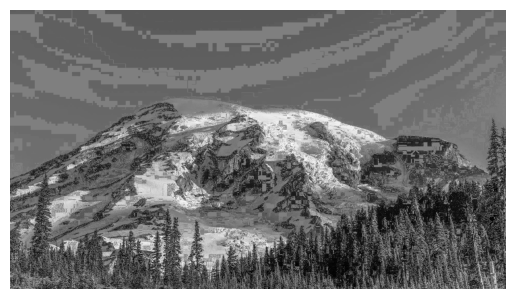

In [57]:
pt.imshow(img_comp, cmap='gray')
pt.axis('off')

(0.0, 255.0)

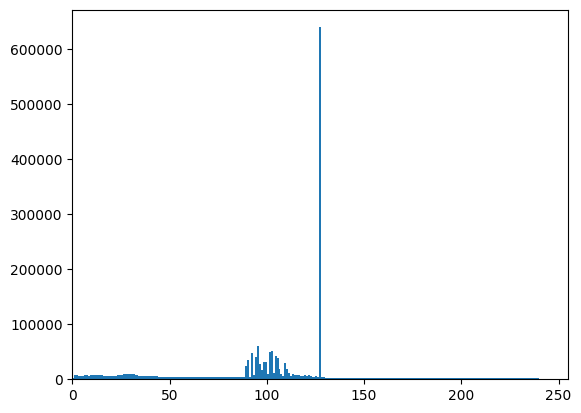

In [58]:
counts_comp, bins = np.histogram(img_comp, bins=np.arange(0,256))
pt.stairs(counts_comp, bins, fill=True)
pt.xlim(0,255)

### Mudando o contraste

In [120]:
def contrast(img, mode):
    if mode == 'log':
        img = np.array((255/(np.log(1+img.max())))*np.log(1+img), dtype=int)
    if mode == 'exp':
        img = np.array((255/(np.exp(img.min())-1))*(np.exp(img)-1), dtype=int)
    return img

In [121]:
img_log = contrast(img, 'log')
img_exp = contrast(img, 'exp')

<ipython-input-120-e0fa0c84da0b>:5: RuntimeWarning: invalid value encountered in cast
  img = np.array((255/(np.exp(img.min())-1))*(np.exp(img)-1), dtype=int)


(-0.5, 1023.5, 682.5, -0.5)

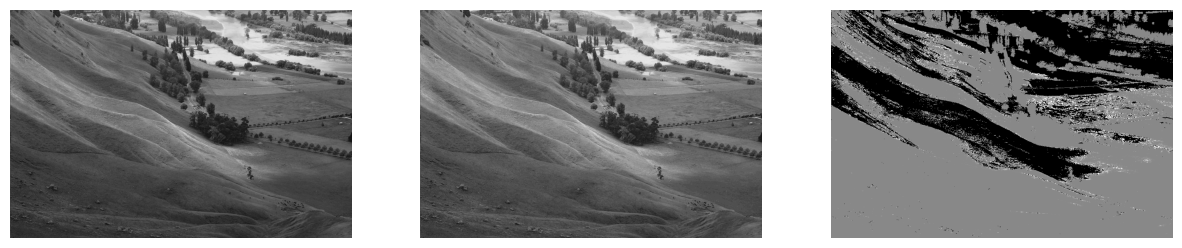

In [122]:
fig, ax = pt.subplots(1,3, figsize=(15,20))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_log, cmap='gray')
ax[2].imshow(img_exp, cmap='gray')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

### Equalizando imagens com o pacote skimage



In [ ]:
from skimage import exposure

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


(-0.5, 1023.5, 682.5, -0.5)

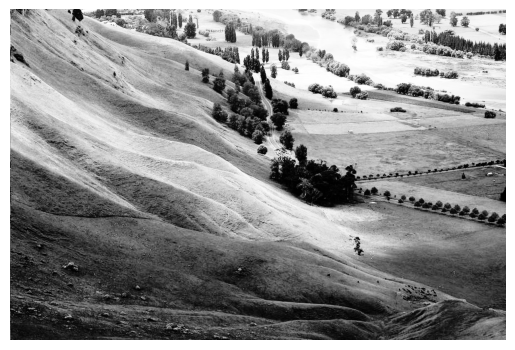

In [36]:
img_eq = exposure.equalize_hist(img)
pt.imshow(img_eq)
pt.axis('off')

### Usando diferentes tresholds a partir do pacote skimage

(-0.5, 1023.5, 767.5, -0.5)

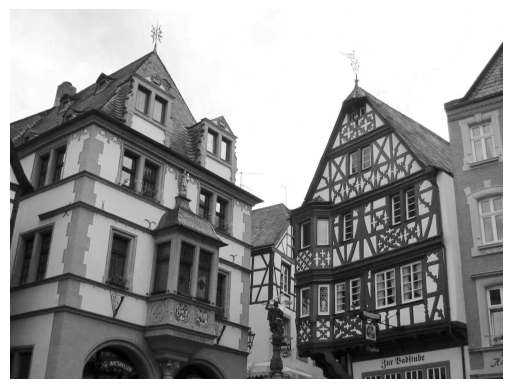

In [92]:
img = io.imread('https://github.com/pedromazim/visao/blob/main/Image_processing_pre_otsus_algorithm.jpg?raw=true')
pt.imshow(img, cmap='gray')
pt.axis('off')

In [87]:
from skimage.filters import threshold_otsu, threshold_mean

In [88]:
otsu = threshold_otsu(img)
mean = threshold_mean(img)
hist = int(np.mean(np.where(np.histogram(img, bins=np.arange(0,256))[0]!=0)[0]))

(-0.5, 1023.5, 767.5, -0.5)

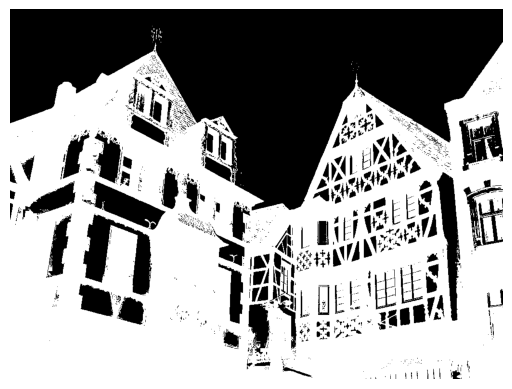

In [89]:
img_otsu = img < otsu
pt.imshow(img_otsu, cmap='gray')
pt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

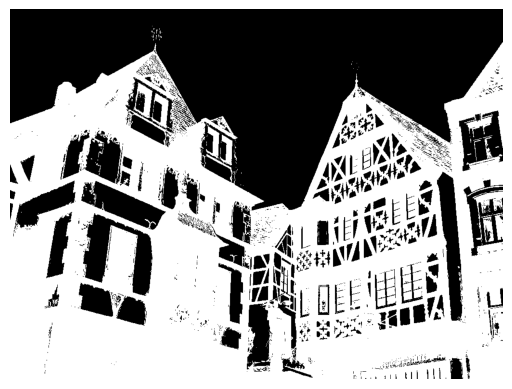

In [90]:
img_mean = img < mean
pt.imshow(img_mean, cmap='gray')
pt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

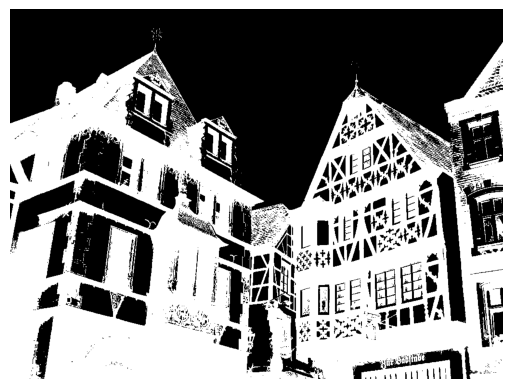

In [91]:
img_hist = img < hist
pt.imshow(img_hist, cmap='gray')
pt.axis('off')